# IRTM Second Project

Ghadamiyan Lida, class 507

In [15]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt

import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')
stemmer = SnowballStemmer('english')

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler

from sklearn.naive_bayes import MultinomialNB
from sklearn import svm
from sklearn.cluster import KMeans, DBSCAN

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics.cluster import fowlkes_mallows_score

import seaborn as sns
import cufflinks as cf


from sklearn.pipeline import Pipeline 
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV

cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\lidag\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\lidag\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lidag\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data preprocessing

In [16]:
data = pd.read_csv("Lyrics-Genre-Train.csv")

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18513 entries, 0 to 18512
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Song       18513 non-null  object
 1   Song year  18513 non-null  int64 
 2   Artist     18513 non-null  object
 3   Genre      18513 non-null  object
 4   Lyrics     18513 non-null  object
 5   Track_id   18513 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 867.9+ KB


In [4]:
print(data['Genre'].unique())

['Metal' 'Hip-Hop' 'Country' 'Jazz' 'Electronic' 'Pop' 'Folk' 'Rock' 'R&B'
 'Indie']


In [5]:
numeric_labels=[]

for i in range(0, len(data.index)):

    if data.Genre[i] == 'Metal':
        numeric_labels.append(0)
    
    if data.Genre[i] == 'Hip-Hop':
        numeric_labels.append(1)
        
    if data.Genre[i] == 'Country':
        numeric_labels.append(2)
        
    if data.Genre[i] == 'Jazz':
        numeric_labels.append(3)
        
    if data.Genre[i] == 'Electronic':
        numeric_labels.append(4)
        
    if data.Genre[i] == 'Pop':
        numeric_labels.append(5)
        
    if data.Genre[i] == 'Folk':
        numeric_labels.append(6)
        
    if data.Genre[i] == 'Rock':
        numeric_labels.append(7)
        
    if data.Genre[i] == 'R&B':
        numeric_labels.append(8)
        
    if data.Genre[i] == 'Indie':
        numeric_labels.append(9)

In [6]:
data2 = []
for i in range(0, len(data.index)):

    # Punctuation removal
    table = str.maketrans(dict.fromkeys(string.punctuation))                   
    sentences = (data.Lyrics[i].translate(table))

    # " '\n " removal
    words = sentences[:-3] 

    # Tokenization
    words = nltk.word_tokenize(words)

    # shrt words removal & lemmatization & stemming
    words_ = []
    for word in words:
        if len(word) > 2:   
            if not word.isnumeric():                                                  
                word1 = stemmer.stem(WordNetLemmatizer().lemmatize(word, pos='v'))          
                words_.append(word1)
    data2.append(words_)  

In [7]:
df = pd.DataFrame({'lyr':data2, 'gen':numeric_labels})   

In [8]:
comparison = pd.DataFrame({'lyrics': data['Lyrics'], 'preprocessed lyrics': data2, 'Genre': data['Genre'], 'Prep genre':numeric_labels})

In [9]:
comparison.head()

,lyrics,preprocessed lyrics,Genre,Prep genre
0,"I am a night in to the darkness, only soul los...","[night, the, dark, onli, soul, lose, with, wal...",Metal,0
1,"Yeah\nSometimes, i just wanna fly away.\nThey ...","[yeah, sometim, just, wan, fli, away, they, sa...",Hip-Hop,1
2,Do you work hard?\nDo you work hard?\nYou don'...,"[you, work, hard, you, work, hard, you, dont, ...",Metal,0
3,You know what? I'm destined to be the last man...,"[you, know, what, destin, the, last, man, stan...",Hip-Hop,1
4,There ain't nothing that I would rather see\nT...,"[there, aint, noth, that, would, rather, see, ...",Country,2


In [10]:
data['Genre'].value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of samples', title='Genre')

In [11]:
data['Artist'].value_counts().sort_values(ascending=False).iplot(kind='bar', title='Lyrics')

In [12]:
data['Song year'].value_counts().sort_values(ascending=False).iplot(kind='bar', title='Lyrics')

In [12]:
lst = []

for element in data2:
    for word in element:
        lst.append(word)

With stopwords

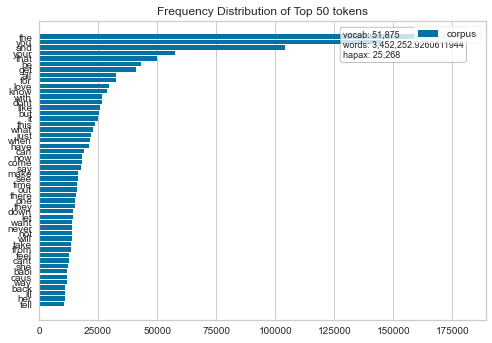

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [13]:
from yellowbrick.text import FreqDistVisualizer

cvect = CountVectorizer(ngram_range=(1, 1), lowercase='true') 
tfidf_transformer = TfidfTransformer(norm= 'l2', use_idf= False)

data1_ = cvect.fit_transform(lst)
data_ = tfidf_transformer.fit_transform(data1_)
features = cvect.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(data_)
visualizer.poof()

Without stopwords

In [14]:
stop_words = set(stopwords.words('english'))
filtered_sentence = [w for w in lst if not w.lower() in stop_words]

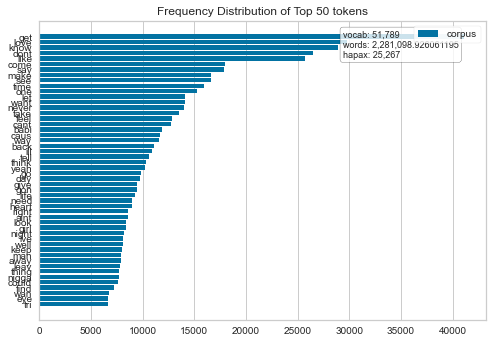

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [15]:
cvect = CountVectorizer(ngram_range=(1, 1), lowercase='true') 
tfidf_transformer = TfidfTransformer(norm= 'l2', use_idf= False)

data1_ = cvect.fit_transform(filtered_sentence)
data_ = tfidf_transformer.fit_transform(data1_)
features = cvect.get_feature_names()

visualizer = FreqDistVisualizer(features=features)
visualizer.fit(data_)
visualizer.poof()

In [16]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [17]:
s = ''
for word in filtered_sentence:
    s += ' '+str(word)

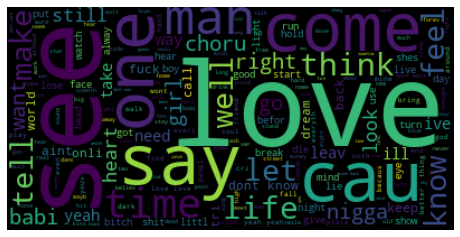

In [18]:
wordcloud = WordCloud().generate(s)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Train data and test data labels ditribution

In [13]:
train_data__, test_data__, train_labels, test_labels = train_test_split(df['lyr'], df['gen'], test_size = 0.2, random_state = 25)

In [14]:
train_labels.value_counts().sort_values(ascending=False).iplot(kind='bar', yTitle='Number of samples', title='Genre')